table of contents  
1. Prepare  
2. Data Read, Preprocess  
3. Aggreagete, Vizualize

# Prepare

## Import Library

In [1]:
import os, time, sys, importlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

sys.path.append(os.path.join('..','src'))
from Metrica_IO import *
from Metrica_Velocities import calc_player_velocities
from Metrica_Viz import *

## Define Static Parameter

In [2]:
base_dir = os.path.join('..')
data_dir = os.path.join(base_dir,'..','sample-data','data')

# Data Read, Preprocess

In [6]:
dataset_dict = {}
for game_id in range(1,3):
    home_df, away_df, events_df = read_match_data(data_dir, game_id)
    home_df, away_df, events_df = to_metric_coordinates(home_df), to_metric_coordinates(away_df), to_metric_coordinates(events_df)
    dataset_dict[f'game_id={game_id}'] = to_single_playing_direction(home_df, away_df, events_df)

Reading team: home
Reading team: away
Reading team: home
Reading team: away


In [7]:
for k, df_list in dataset_dict.items():
    print(k)
    for df in df_list:
        display(df.head())

game_id=1


,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-52.91308,1.19816,-18.39312,-10.41896,-17.27694,0.77316,-20.21738,9.84028,...,5.55758,4.57708,NaN,NaN,NaN,NaN,NaN,NaN,-4.79968,7.67788
2,1,0.08,-52.89824,1.19816,-18.39312,-10.41896,-17.27694,0.77316,-20.21738,9.84028,...,5.55758,4.57708,NaN,NaN,NaN,NaN,NaN,NaN,-0.37630,6.35392
3,1,0.12,-52.87916,1.19816,-18.39312,-10.41896,-17.27694,0.77316,-20.21738,9.84028,...,5.55758,4.57708,NaN,NaN,NaN,NaN,NaN,NaN,3.93896,5.06192
4,1,0.16,-52.87174,1.19816,-18.42068,-10.41556,-17.29178,0.68816,-20.19936,9.82328,...,5.55016,4.54716,NaN,NaN,NaN,NaN,NaN,NaN,5.66676,5.28292
5,1,0.20,-52.86326,1.19816,-18.44718,-10.38292,-17.31616,0.66776,-20.19512,9.84096,...,5.51412,4.54852,NaN,NaN,NaN,NaN,NaN,NaN,5.84272,6.41240


,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,...,Away_24_x,Away_24_y,Away_26_x,Away_26_y,Away_27_x,Away_27_y,Away_28_x,Away_28_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,42.93954,1.72584,8.89658,19.86008,18.71748,2.23720,18.34860,-18.00368,...,-12.89702,15.37956,NaN,NaN,NaN,NaN,NaN,NaN,-4.79968,7.67788
2,1,0.08,42.92364,1.72584,8.89658,19.86008,18.71748,2.23720,18.34860,-18.00368,...,-12.89702,15.37956,NaN,NaN,NaN,NaN,NaN,NaN,-0.37630,6.35392
3,1,0.12,42.86004,1.72516,8.89658,19.86008,18.71748,2.23720,18.34860,-18.00368,...,-12.89702,15.37956,NaN,NaN,NaN,NaN,NaN,NaN,3.93896,5.06192
4,1,0.16,42.79962,1.72516,8.85206,19.80976,18.69840,2.20184,18.31574,-18.04856,...,-12.97864,15.31836,NaN,NaN,NaN,NaN,NaN,NaN,5.66676,5.28292
5,1,0.20,42.74344,1.72448,8.78846,19.69348,18.65494,2.19708,18.28818,-18.06352,...,-13.07722,15.27076,NaN,NaN,NaN,NaN,NaN,NaN,5.84272,6.41240


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,-5.3,7.48,5.30,4.76
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,5.3,4.76,8.48,19.72
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,5.3,21.08,-5.30,12.92
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,-5.3,12.24,-1.06,2.04


game_id=2


,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,...,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
2,1,0.08,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
3,1,0.12,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
4,1,0.16,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
5,1,0.20,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44


# Summarize, Vizualization

In [8]:
cmap = plt.get_cmap('tab10')

## only Event

game_id=1
game_id=2


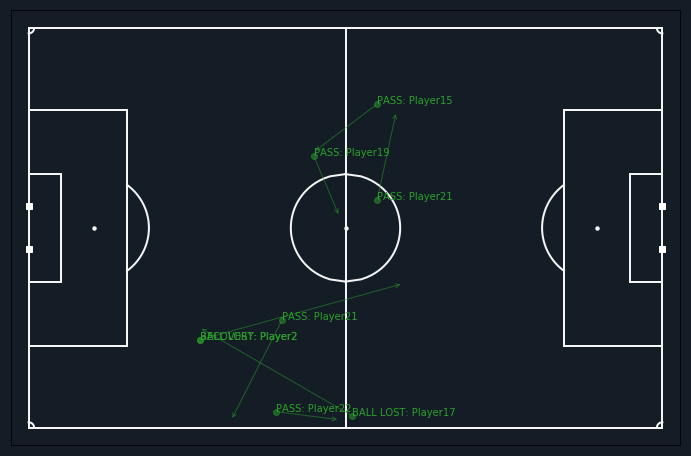

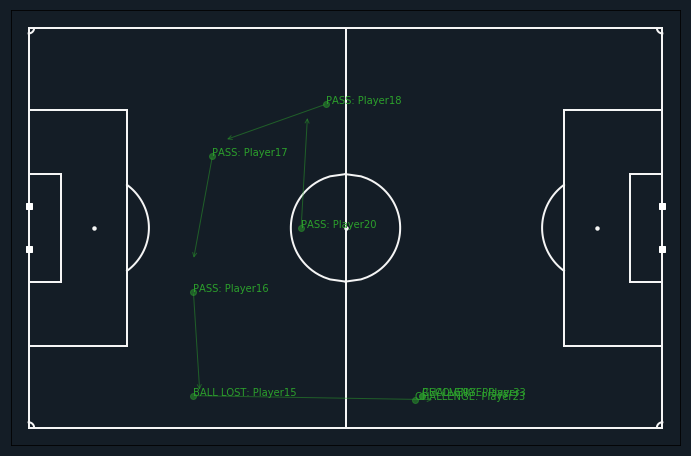

In [9]:
for k, df_list in dataset_dict.items():
    events_df = df_list[-1]
    print(k)
    plot_events(events_df.iloc[2:10], plot_pitch(field_color='twitter_dark_mode'), color=cmap(2), annotate=True)

## only tracking

game_id=1
game_id=2


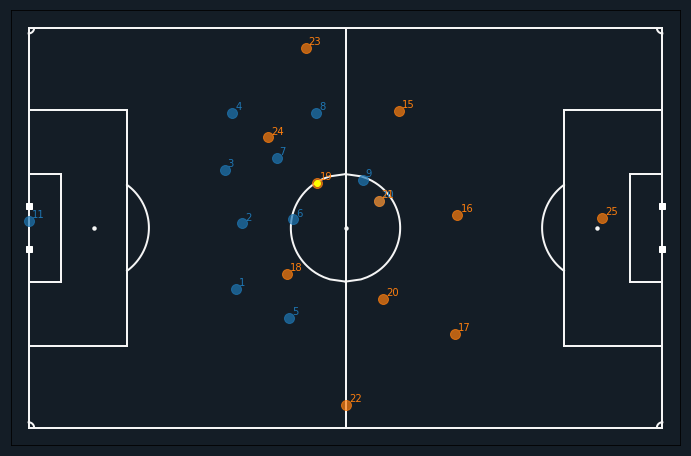

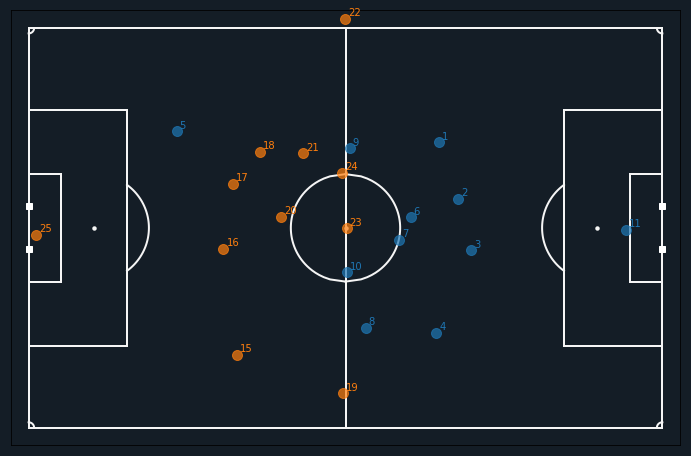

In [10]:
for k, (home_df, away_df, events_df) in dataset_dict.items():
    print(k)
    plot_frame(home_df.iloc[0], away_df.iloc[0], plot_pitch(field_color='twitter_dark_mode'), team_colors=(cmap(0), cmap(1)), annotate=True)

## combination

Text(0.5,1,'Time [s] == 0.12')

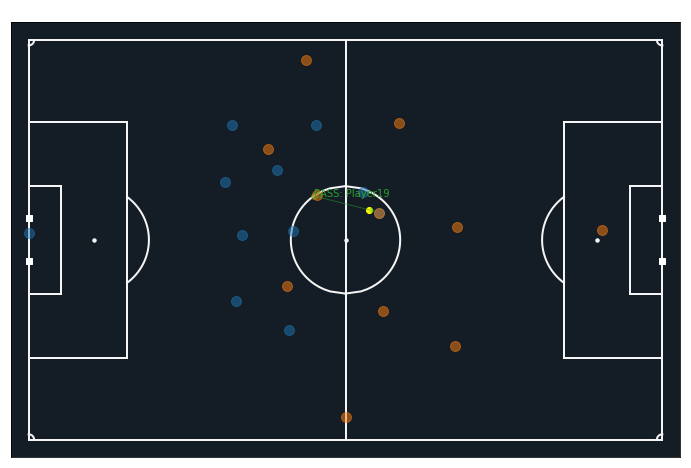

In [11]:
tm = events_df[events_df.Type!='SET PIECE'].at[1, 'End Time [s]']

(fig,ax) = plot_pitch(field_color='twitter_dark_mode')
plot_events(events_df[events_df.Type!='SET PIECE'].iloc[:1], (fig,ax), color=cmap(2), annotate=True)
plot_frame(home_df[home_df['Time [s]']==tm], away_df[away_df['Time [s]']==tm], (fig,ax), team_colors=(cmap(0), cmap(1)), PlayerAlpha=0.5)

ax.set_title(f'Time [s] == {tm}', color='white')


In [12]:
home_df[home_df['Time [s]']==tm].values

array([[  1.     ,   0.12   , -52.87916,   1.19816, -18.39312, -10.41896,
        -17.27694,   0.77316, -20.21738,   9.84028, -18.93478,  19.54184,
         -9.44036, -15.36052,  -8.80012,   1.46676, -11.5275 ,  11.866  ,
         -4.88872,  19.60168,   2.85882,   8.1736 ,   5.55758,   4.57708,
              nan,       nan,       nan,       nan,       nan,       nan,
          3.93896,   5.06192]])

In [13]:
away_df[away_df['Time [s]']==tm].values

array([[  1.     ,   0.12   ,  42.86004,   1.72516,   8.89658,  19.86008,
         18.71748,   2.2372 ,  18.3486 , -18.00368,  -9.77002,  -7.837  ,
         -4.79968,   7.67788,   6.3176 , -12.087  ,   5.55758,   4.57708,
          0.07102, -30.13896,  -6.68542,  30.59864, -12.89702,  15.37956,
              nan,       nan,       nan,       nan,       nan,       nan,
          3.93896,   5.06192]])